In [1]:
import os

# Construct paths dynamically
source_data_dir = "./data/confonet"  # Path to source data directory
target_data_dir = "./data/confonet_preprocessed"  # Path to target directory for preprocessed data

# Paths for individual files
agent_file = os.path.join(source_data_dir, "agent.json")
entities_dir = os.path.join(source_data_dir, "entities")
intents_dir = os.path.join(source_data_dir, "intents")
package_file = os.path.join(source_data_dir, "package.json")

# Check if the source directory exists
if not os.path.exists(source_data_dir):
    print(f"Error: {source_data_dir} does not exist.")
else:
    print(f"Source directory exists: {source_data_dir}")

# Check if the target directory exists (optional)
if not os.path.exists(target_data_dir):
    print(f"Error: {target_data_dir} does not exist.")
else:
    print(f"Target directory exists: {target_data_dir}")

# Construct and run the shell command
command = (
    f"python data/dialogflow_convertdata.py "  # Adjusted for correct script path
    f"--dataset_name dialogflow "
    f"--source_data_dir {source_data_dir} "
    f"--target_data_dir {target_data_dir} "
    f"--do_lower_case "
    f"--use_full_dataset"
)

# Execute the command
os.system(command)


Source directory exists: ./data/confonet
Target directory exists: ./data/confonet_preprocessed


0

In [8]:
import os
import subprocess
import yaml
from data import import_datasets

# Set up directories
DATA_DIR = "data"
CONFIG_DIR = "conf"
MODEL_SCRIPT = "intent_slot_classification.py"

# Utility function to check required files
def check_required_files():
    required_files = [
        os.path.join(DATA_DIR, "confonet_preprocessed/dict.intents.csv"),
        os.path.join(DATA_DIR, "confonet_preprocessed/dict.slots.csv"),
        os.path.join(DATA_DIR, "confonet_preprocessed/test.tsv"),
        os.path.join(DATA_DIR, "confonet_preprocessed/train_slots.tsv"),
        os.path.join(DATA_DIR, "confonet_preprocessed/test_slots.tsv"),
        os.path.join(CONFIG_DIR, "config/intent_slot_classification_config.yaml"),
        #os.path.join(CONFIG_DIR, "hyperparameters.yaml"),
    ]
    
    missing_files = [f for f in required_files if not os.path.isfile(f)]
    if missing_files:
        raise FileNotFoundError(f"Missing required files: {missing_files}")
    print("All required files are present.")

# Load configuration
def load_config(config_path):
    with open(config_path, 'r') as file:
        config = yaml.safe_load(file)
    return config

# Train the model
def train_model():
    check_required_files()

    # Load configurations
    intent_slot_config_path = os.path.join(CONFIG_DIR, "config/intent_slot_classification_config.yaml")
    #hparams_config_path = os.path.join(CONFIG_DIR, "hyperparameters.yaml")
    
    intent_slot_config = load_config(intent_slot_config_path)
    #hparams_config = load_config(hparams_config_path)

    print("Training Configurations:")
    print(intent_slot_config)
    #print(hparams_config)

    # Run training script
    print("Starting model training...")
    try:
        subprocess.run(
            ["python", MODEL_SCRIPT, 
             "--config", intent_slot_config_path, 
             ],
            check=True
        )
        print("Model training completed successfully!")
    except subprocess.CalledProcessError as e:
        print("Error during training:", e)

if __name__ == "__main__":
    try:
        train_model()
    except Exception as e:
        print("An error occurred:", e)


All required files are present.
Training Configurations:
{'trainer': {'gpus': 1, 'num_nodes': 1, 'max_epochs': 10, 'max_steps': None, 'accumulate_grad_batches': 1, 'precision': 32, 'accelerator': 'ddp', 'log_every_n_steps': 1, 'val_check_interval': 1.0, 'resume_from_checkpoint': None, 'checkpoint_callback': False, 'logger': False}, 'model': {'nemo_path': None, 'data_dir': '/flash/dev/convAI/nemo-1.6/examples/nlp/intent_slot_classification/data/confonet_preprocessed', 'class_labels': {'intent_labels_file': 'dict.intents.csv', 'slot_labels_file': 'dict.slots.csv'}, 'class_balancing': None, 'intent_loss_weight': 0.6, 'pad_label': -1, 'ignore_extra_tokens': False, 'ignore_start_end': True, 'train_ds': {'prefix': 'train', 'batch_size': 32, 'shuffle': True, 'num_samples': -1, 'num_workers': 2, 'drop_last': False, 'pin_memory': False}, 'validation_ds': {'prefix': 'test', 'batch_size': 32, 'shuffle': False, 'num_samples': -1, 'num_workers': 2, 'drop_last': False, 'pin_memory': False}, 'test_ds

################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################

[NeMo W 2024-12-12 05:24:49 experimental:27] Module <function get_argmin_mat at 0x7f4fbe3f1c10> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2024-12-12 05:24:49 experimental:27] Module <function getMultiScaleCosAffinityMatrix at 0x7f4fcec0e3a0> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2024-12-12 05:24:49 experimental:27] Module <function parse_scale_configs at 0x7f4fbe3f74c0> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2024

Error during training: Command '['python', 'intent_slot_classification.py', '--config', 'conf/config/intent_slot_classification_config.yaml']' returned non-zero exit status 2.


In [3]:
import torch
import pytorch_lightning as pl
import nemo
import torchtext

print("PyTorch version:", torch.__version__)
print("TorchText version:", torchtext.__version__)
print("PyTorch Lightning version:", pl.__version__)
print("NeMo version:", nemo.__version__)
print("CUDA available:", torch.cuda.is_available())



PyTorch version: 1.11.0a0+b6df043
TorchText version: 0.11.0a0+d697db5
PyTorch Lightning version: 1.5.9
NeMo version: 1.6.1
CUDA available: True


In [2]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)


PyTorch version: 1.11.0a0+b6df043
CUDA available: True
CUDA version: 11.5


Diagnostic Tools

In [10]:
def analyze_class_distribution(df, target_column):
    # Visualize class distribution
    class_distribution = df[target_column].value_counts()
    print("Class Distribution:")
    print(class_distribution)
    print("\nPercentage Distribution:")
    print(class_distribution / len(df) * 100)
    
    # Plotting
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    class_distribution.plot(kind='bar')
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.show()

Data Balancing

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

def balance_dataset(df, target_column):
    # Identify class distribution
    class_counts = df[target_column].value_counts()
    
    # Find the majority class count
    max_count = class_counts.max()
    
    # Balanced dataset storage
    balanced_df = pd.DataFrame()
    
    # Balance each class
    for class_name in class_counts.index:
        class_df = df[df[target_column] == class_name]
        
        if len(class_df) < max_count:
            # Oversample minority classes
            oversampled = resample(
                class_df, 
                replace=True,     # sample with replacement
                n_samples=max_count,    # to match majority class
                random_state=42   # reproducible results
            )
            balanced_df = pd.concat([balanced_df, oversampled])
        else:
            # Use original class data if it's already the majority
            balanced_df = pd.concat([balanced_df, class_df])
    
    return balanced_df

Advanced Resampling Techniques

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

def advanced_resampling(X, y):
    # SMOTE for oversampling
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    # Alternatively, combined approach
    # rus = RandomUnderSampler(random_state=42)
    # X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)
    
    return X_resampled, y_resampled

Class Weight Adjustment

In [5]:
from sklearn.utils.class_weight import compute_class_weight

def compute_adjusted_weights(y):
    # Compute class weights
    class_weights = compute_class_weight(
        class_weight='balanced', 
        classes=np.unique(y), 
        y=y
    )
    
    # Convert to dictionary for model input
    return dict(enumerate(class_weights))

Comprehensive Imbalance Handling Pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def preprocess_imbalanced_dataset(df, target_column):
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Encode target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    
    # Apply advanced resampling
    X_resampled, y_resampled = advanced_resampling(
        X.values, 
        y_encoded
    )
    
    # Compute class weights
    class_weights = compute_adjusted_weights(y_resampled)
    
    # Split resampled data
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, 
        y_resampled, 
        test_size=0.3, 
        random_state=42
    )
    
    return {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'class_weights': class_weights,
        'label_encoder': le
    }

In [7]:
!tao intent_slot_classification train \
                                -e $SPECS_DIR/train.yaml \
                                -g 1 \
                                -k $KEY \
                                -r $RESULTS_DIR/train \
                                data_dir=$DATA_DIR/NLU-Evaluation-Data-processed \
                                trainer.max_epochs=1 \
                                training_ds.num_workers=4 \
                                validation_ds.num_workers=4

/bin/bash: tao: command not found


In [11]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

def compute_adjusted_weights(y):
    """
    Computes balanced class weights for the input target labels y.
    
    Parameters:
        y (array-like): List or numpy array of target labels.
        
    Returns:
        dict: Dictionary mapping class indices to their respective computed weights.
    """
    # Ensure y is a numpy array for compatibility
    y = np.array(y)
    
    # Compute class weights using sklearn's compute_class_weight
    class_weights = compute_class_weight(
        class_weight='balanced', 
        classes=np.unique(y), 
        y=y
    )
    
    # Convert class weights into a dictionary format for model input
    return dict(enumerate(class_weights))

# Define target labels
y = [2, 3, 3, 4, 4, 5, 5]

# Compute adjusted weights
weights = compute_adjusted_weights(y)
print("Class Weights:", weights)


Class Weights: {0: 1.75, 1: 0.875, 2: 0.875, 3: 0.875}


SyntaxError: invalid syntax (3148587149.py, line 7)

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the Data
def load_data(file_path):
    
    # Load TSV file assuming no headers
    df = pd.read_csv(file_path, sep='\t', header=None, names=['sentence', 'intent'])
    return df

# 2. Count the Occurrence of Each Intent
def count_intents(df):
    
    intent_counts = df['intent'].value_counts()
    return intent_counts

# 3. Export Combined Intent Counts to CSV
def export_combined_intent_counts_to_csv(train_counts, test_counts, output_file):
    
    # Convert counts to DataFrame
    train_counts_df = train_counts.reset_index()
    test_counts_df = test_counts.reset_index()
    
    # Rename columns for clarity
    train_counts_df.columns = ['intent', 'train_count']
    test_counts_df.columns = ['intent', 'test_count']
    
    # Merge the two DataFrames on 'intent'
    combined_counts = pd.merge(train_counts_df, test_counts_df, on='intent', how='outer').fillna(0)
    
    # Export to CSV
    combined_counts.to_csv(output_file, index=False)
    print(f"\nCombined intent counts exported to: {output_file}")

# 4. Main Function to Execute the Analysis
def intent_analysis(train_file_path, test_file_path, output_file):
    
    # Load the data
    train_df = load_data(train_file_path)
    test_df = load_data(test_file_path)
    
    print("First 5 rows of the Train Data:")
    print(train_df.head())
    print("\nFirst 5 rows of the Test Data:")
    print(test_df.head())
    
    # Count the occurrences of each intent for train and test datasets
    train_intent_counts = count_intents(train_df)
    test_intent_counts = count_intents(test_df)
    
    print("\nTrain Intent Counts:")
    print(train_intent_counts)
    print("\nTest Intent Counts:")
    print(test_intent_counts)
    
    # Export the combined intent counts to CSV
    export_combined_intent_counts_to_csv(train_intent_counts, test_intent_counts, output_file)

# 5. File Paths
train_file_path = 'data/confonet_preprocessed/train.tsv'
test_file_path = 'data/confonet_preprocessed/test.tsv'
output_file = 'data/confonet_preprocessed/combined_intent_counts.csv'

# 6. Run the Analysis
intent_analysis(train_file_path, test_file_path, output_file)


First 5 rows of the Train Data:
                                          sentence intent
0                                         sentence  label
1                           I am asking to help me      0
2                            what is case hearing?      0
3                   displayboard not showing items      1
4  Consumer disputes redressal forum display board      1

First 5 rows of the Test Data:
                                    sentence intent
0                                   sentence  label
1                 what case status apply on?      0
2   what is use of display board in confonet      1
3  I do not understand what display board is      1
4                           you are very bad      2

Train Intent Counts:
36       64
22       63
27       51
37       50
25       50
18       48
26       45
10       44
20       43
11       42
3        42
34       38
5        37
15       37
31       36
7        34
33       32
12       32
2        31
14       29
29       28
38

First 5 rows of the data:
                                    sentence intent
0                                   sentence  label
1                 what case status apply on?      0
2   what is use of display board in confonet      1
3  I do not understand what display board is      1
4                           you are very bad      2

Intent Counts:
22       11
37        9
18        8
36        8
34        8
12        5
4         5
33        5
26        5
31        4
27        4
19        4
15        4
38        4
3         4
13        3
11        3
5         3
6         3
25        2
1         2
32        2
30        2
29        2
14        2
8         2
9         2
21        2
20        2
10        2
17        2
16        2
24        1
7         1
28        1
0         1
35        1
2         1
label     1
Name: intent, dtype: int64


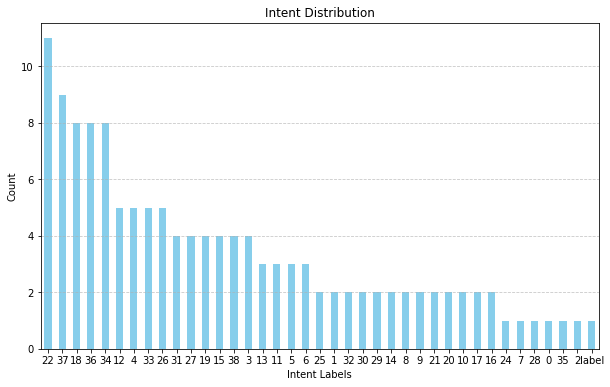

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the Data
def load_intent_data(file_path):
    """
    Load the TSV file with sentences and intent labels.
    
    Parameters:
        file_path (str): Path to the train.tsv file.
        
    Returns:
        pd.DataFrame: DataFrame containing the sentences and intent labels.
    """
    # Load TSV file assuming no headers
    df = pd.read_csv(file_path, sep='\t', header=None, names=['sentence', 'intent'])
    return df

# 2. Count the Occurrence of Each Intent
def count_intents(df):
    """
    Count the number of occurrences of each intent label.
    
    Parameters:
        df (pd.DataFrame): DataFrame with 'intent' column.
        
    Returns:
        pd.Series: Count of each unique intent label.
    """
    intent_counts = df['intent'].value_counts()
    return intent_counts

# 3. Visualize the Intent Distribution
def plot_intent_distribution(intent_counts):
    """
    Plot the distribution of intent labels as a bar chart.
    
    Parameters:
        intent_counts (pd.Series): Series with intent counts.
    """
    plt.figure(figsize=(10, 6))
    intent_counts.plot(kind='bar', color='skyblue')
    plt.title('Intent Distribution')
    plt.xlabel('Intent Labels')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# 4. Main Function to Execute the Analysis
def intent_analysis(file_path):
    """
    Load the data, count intents, and plot the distribution.
    
    Parameters:
        file_path (str): Path to the train.tsv file.
    """
    # Load the data
    df = load_intent_data(file_path)
    print("First 5 rows of the data:")
    print(df.head())
    
    # Count the occurrences of each intent
    intent_counts = count_intents(df)
    print("\nIntent Counts:")
    print(intent_counts)
    
    # Plot the intent distribution
    plot_intent_distribution(intent_counts)

# 5. Update File Path to 'data/confonet_preprocessed/train.tsv'
file_path = 'data/confonet_preprocessed/test.tsv'

# 6. Run the Analysis
intent_analysis(file_path)


In [24]:
# Import necessary libraries
import pandas as pd

# 1. Load the combined_intent_counts.csv file
def load_combined_intent_counts(file_path):

    df = pd.read_csv(file_path)
    return df

# 2. Sort the DataFrame by 'intent' and 'f1 scores' in descending order
def sort_intent_counts(df):
   
    # Sort by 'intent' and 'f1 scores' in descending order
    sorted_df = df.sort_values(by=['intent', 'f1_scores'], ascending=[False, False])
    return sorted_df

# 3. Export the sorted DataFrame to a new CSV file
def export_sorted_data(df, output_file):
   
    df.to_csv(output_file, index=False)
    print(f"Sorted data exported to: {output_file}")

# 4. Main Function to Execute the Analysis
def sort_and_export_combined_intent_counts(input_file, output_file):
 
    # Load the data
    df = load_combined_intent_counts(input_file)
    print("First 5 rows of the original data:")
    print(df.head())
    
    # Sort the data
    sorted_df = sort_intent_counts(df)
    
    # Export the sorted data
    export_sorted_data(sorted_df, output_file)
    
    print("\nSorted Data:")
    print(sorted_df.head())

# 5. File Paths
input_file = 'data/confonet_preprocessed/combined_intent_counts.csv'
output_file = 'data/confonet_preprocessed/sorted_combined_intent_counts.csv'

# 6. Run the Analysis
sort_and_export_combined_intent_counts(input_file, output_file)


First 5 rows of the original data:
   intent            intent_id  train_count  test_count  f1_scores
0      36     confo_casestatus           64           8      66.67
1      22      caseconfirm_yes           63          11      64.00
2      27         case_formats           51           4      44.44
3      37  confo_casestatus_no           50           9      12.50
4      25  confo_how_causelist           50           2     100.00
Sorted data exported to: data/confonet_preprocessed/sorted_combined_intent_counts.csv

Sorted Data:
    intent               intent_id  train_count  test_count  f1_scores
21      38              confirm_no           28           4       0.00
3       37     confo_casestatus_no           50           9      12.50
0       36        confo_casestatus           64           8      66.67
28      35  Default Welcome Intent           19           1       0.00
11      34              agent_name           38           8     100.00


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   intent       39 non-null     int64  
 1   intent_id    39 non-null     object 
 2   train_count  39 non-null     int64  
 3   test_count   39 non-null     int64  
 4   f1_scores    39 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.6+ KB
None

First 5 rows of the data:
   intent               intent_id  train_count  test_count  f1_scores
0      38              confirm_no           28           4       0.00
1      37     confo_casestatus_no           50           9      12.50
2      36        confo_casestatus           64           8      66.67
3      35  Default Welcome Intent           19           1       0.00
4      34              agent_name           38           8     100.00

Descriptive Statistics:
          intent  train_count  test_count   f1_sco

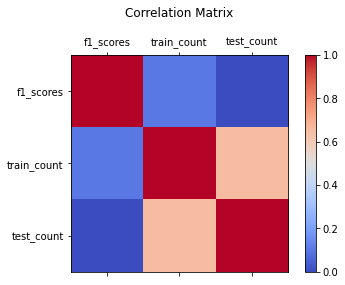

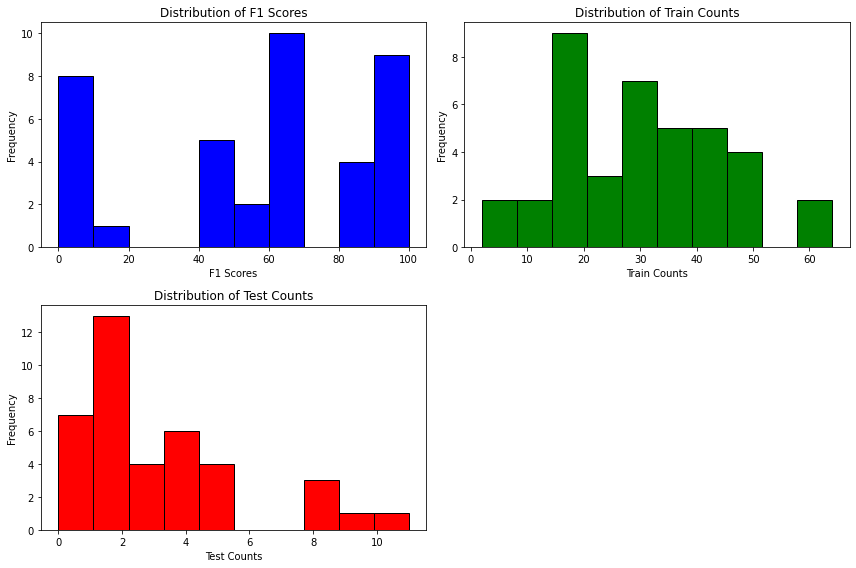

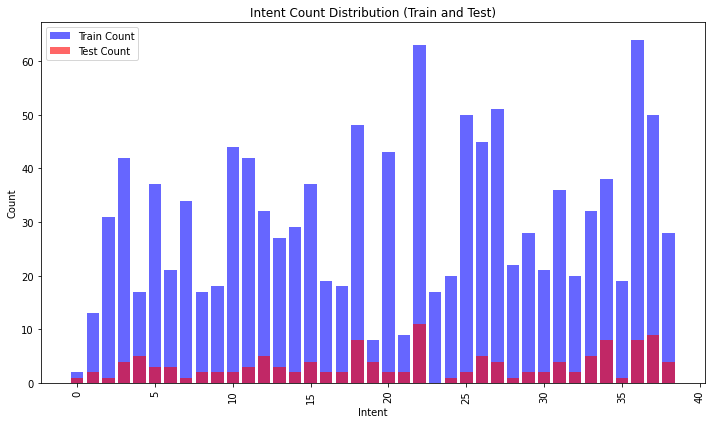

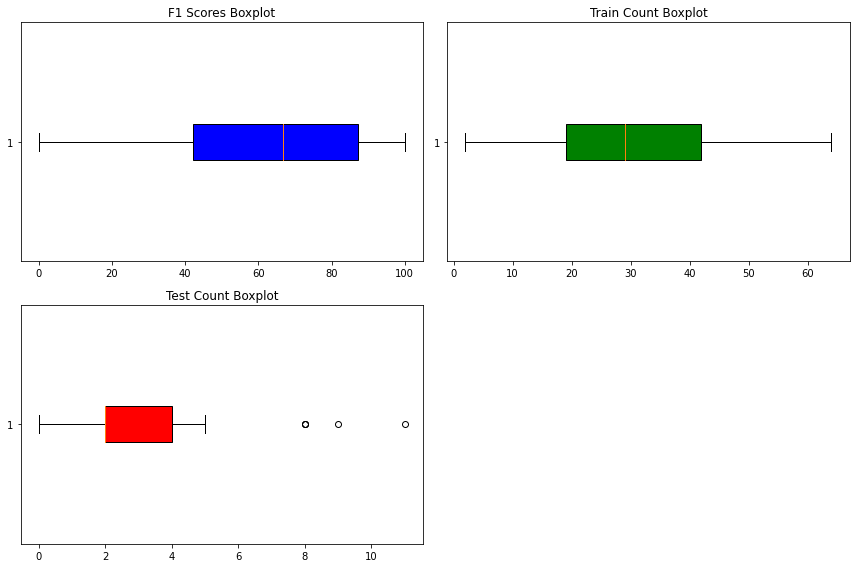


Top 5 Intents with Highest F1 Scores:
    intent  f1_scores
30       8      100.0
36       2      100.0
32       6      100.0
14      24      100.0
13      25      100.0

Intent with Maximum Train Count:
intent         36
train_count    64
Name: 2, dtype: object

Intent with Minimum Train Count:
intent         0
train_count    2
Name: 38, dtype: object

Total Train Count: 1192
Total Test Count: 132


In [28]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the combined_intent_counts.csv file
def load_combined_intent_counts(file_path):
    """
    Load the combined intent counts CSV file.
    
    Parameters:
        file_path (str): Path to the combined_intent_counts.csv file.
        
    Returns:
        pd.DataFrame: DataFrame containing the intent counts.
    """
    df = pd.read_csv(file_path)
    return df

# 2. Basic Overview of the Data
def basic_overview(df):
    """
    Display basic statistics and information about the data.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the intent counts and f1 scores.
    """
    print("Data Overview:")
    print(df.info())
    print("\nFirst 5 rows of the data:")
    print(df.head())
    print("\nDescriptive Statistics:")
    print(df.describe())

# 3. Correlation Analysis (Matrix)
def plot_correlation_matrix(df):
    """
    Plot a correlation matrix for the numeric columns in the DataFrame.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the intent counts and f1 scores.
    """
    correlation_matrix = df[['f1_scores', 'train_count', 'test_count']].corr()
    
    # Plot correlation matrix using Matplotlib
    fig, ax = plt.subplots(figsize=(6, 4))
    cax = ax.matshow(correlation_matrix, cmap='coolwarm')
    fig.colorbar(cax)
    
    # Set axis labels
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['f1_scores', 'train_count', 'test_count'])
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(['f1_scores', 'train_count', 'test_count'])
    
    ax.set_title("Correlation Matrix", pad=20)
    plt.show()

# 4. Distribution of 'f1 scores', 'train_count', and 'test_count'
def plot_feature_distributions(df):
    """
    Plot the distributions of 'f1 scores', 'train_count', and 'test_count'.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the intent counts and f1 scores.
    """
    plt.figure(figsize=(12, 8))
    
    # Plot Distribution of F1 Scores
    plt.subplot(2, 2, 1)
    plt.hist(df['f1_scores'], bins=10, color='blue', edgecolor='black')
    plt.title('Distribution of F1 Scores')
    plt.xlabel('F1 Scores')
    plt.ylabel('Frequency')
    
    # Plot Distribution of Train Counts
    plt.subplot(2, 2, 2)
    plt.hist(df['train_count'], bins=10, color='green', edgecolor='black')
    plt.title('Distribution of Train Counts')
    plt.xlabel('Train Counts')
    plt.ylabel('Frequency')
    
    # Plot Distribution of Test Counts
    plt.subplot(2, 2, 3)
    plt.hist(df['test_count'], bins=10, color='red', edgecolor='black')
    plt.title('Distribution of Test Counts')
    plt.xlabel('Test Counts')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# 5. Intent Count Distribution Visualization
def plot_intent_count_distribution(df):
    """
    Visualize the distribution of intent counts (train_count and test_count) for each intent.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the intent counts and f1 scores.
    """
    # Plot Train Count vs. Test Count for each Intent
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(df['intent'], df['train_count'], color='blue', label='Train Count', alpha=0.6)
    ax.bar(df['intent'], df['test_count'], color='red', label='Test Count', alpha=0.6)
    
    plt.title('Intent Count Distribution (Train and Test)')
    plt.xlabel('Intent')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 6. Boxplot of 'f1 scores', 'train_count', and 'test_count'
def plot_boxplots(df):
    """
    Plot boxplots for 'f1 scores', 'train_count', and 'test_count' to analyze outliers.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the intent counts and f1 scores.
    """
    plt.figure(figsize=(12, 8))
    
    # F1 Score Boxplot
    plt.subplot(2, 2, 1)
    plt.boxplot(df['f1_scores'], vert=False, patch_artist=True, boxprops=dict(facecolor='blue'))
    plt.title('F1 Scores Boxplot')
    
    # Train Count Boxplot
    plt.subplot(2, 2, 2)
    plt.boxplot(df['train_count'], vert=False, patch_artist=True, boxprops=dict(facecolor='green'))
    plt.title('Train Count Boxplot')
    
    # Test Count Boxplot
    plt.subplot(2, 2, 3)
    plt.boxplot(df['test_count'], vert=False, patch_artist=True, boxprops=dict(facecolor='red'))
    plt.title('Test Count Boxplot')
    
    plt.tight_layout()
    plt.show()

# 7. Advanced Data Insights
def advanced_data_insights(df):
    """
    Provide additional analysis like top intents with highest f1 scores, 
    total count across all intents, etc.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the intent counts and f1 scores.
    """
    # Top 5 intents with highest F1 scores
    top_f1_intents = df.sort_values(by='f1_scores', ascending=False).head(5)
    print("\nTop 5 Intents with Highest F1 Scores:")
    print(top_f1_intents[['intent', 'f1_scores']])
    
    # Intent with maximum and minimum train and test counts
    max_train_intent = df.loc[df['train_count'].idxmax()]
    min_train_intent = df.loc[df['train_count'].idxmin()]
    
    print("\nIntent with Maximum Train Count:")
    print(max_train_intent[['intent', 'train_count']])
    
    print("\nIntent with Minimum Train Count:")
    print(min_train_intent[['intent', 'train_count']])
    
    # Total intent counts
    total_train_count = df['train_count'].sum()
    total_test_count = df['test_count'].sum()
    print(f"\nTotal Train Count: {total_train_count}")
    print(f"Total Test Count: {total_test_count}")

# 8. Main Function to Perform Advanced Analysis
def perform_advanced_analysis(input_file):
    """
    Perform advanced analysis on the combined intent counts data.
    
    Parameters:
        input_file (str): Path to the combined_intent_counts.csv file.
    """
    # Load the data
    df = load_combined_intent_counts(input_file)
    
    # Basic Overview
    basic_overview(df)
    
    # Correlation Analysis
    plot_correlation_matrix(df)
    
    # Feature Distributions
    plot_feature_distributions(df)
    
    # Intent Count Distribution
    plot_intent_count_distribution(df)
    
    # Boxplots
    plot_boxplots(df)
    
    # Advanced Data Insights
    advanced_data_insights(df)

# 9. File Path for combined_intent_counts.csv
input_file = 'data/confonet_preprocessed/sorted_combined_intent_counts.csv'

# 10. Run the Advanced Analysis
perform_advanced_analysis(input_file)


In [33]:
%matplotlib inline

Gini Index (Train Count): -0.2710
Gini Index (Test Count): -0.3651
Skewness (Train Count): 0.3414
Skewness (Test Count): 1.3914
Kurtosis (Train Count): -0.4876
Kurtosis (Test Count): 1.3249


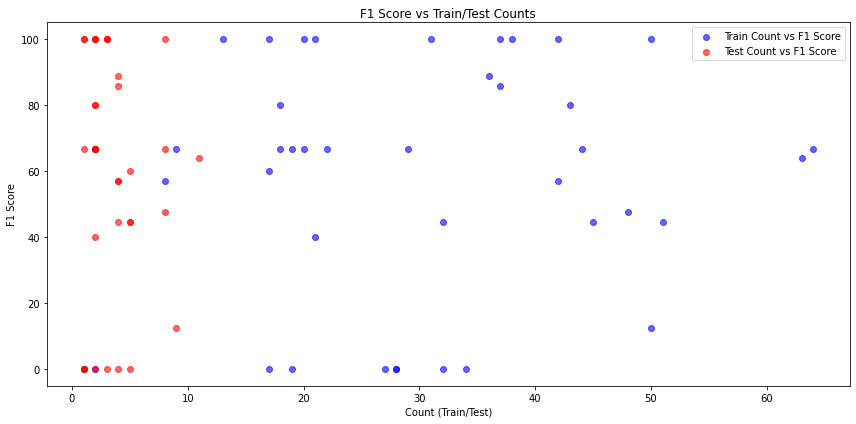

Correlation between Train Count and F1 Score: 0.1008
Correlation between Test Count and F1 Score: -0.0186


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis

# 1. Load Data
df = pd.read_csv('data/confonet_preprocessed/sorted_combined_intent_counts.csv')

# 2. Clean Data: Replace NaNs and zeros
df['train_count'].fillna(1, inplace=True)
df['test_count'].fillna(1, inplace=True)
df['train_count'].replace(0, 1, inplace=True)
df['test_count'].replace(0, 1, inplace=True)

# 3. Class Imbalance Metrics - Gini Index, Skewness, Kurtosis

def gini_index(counts):
    """
    Calculate Gini index for a distribution of counts.
    """
    sorted_counts = np.sort(counts)
    n = len(sorted_counts)
    cumulative_sum = np.cumsum(sorted_counts)
    gini = (2 * np.sum(cumulative_sum) / (n * np.sum(sorted_counts))) - (n + 1) / n
    return gini

def imbalance_metrics(df):
    """
    Calculate advanced imbalance metrics such as Gini index, skewness, and kurtosis.The Gini index measures inequality or class imbalance in the dataset. A Gini index close to 0 indicates a more equal distribution, while a value closer to 1 indicates a high imbalance.
Skewness and Kurtosis:

Skewness measures the asymmetry of the distribution, with negative values indicating a left skew and positive values indicating a right skew.
Kurtosis indicates how heavy the tails of the distribution are. A positive kurtosis indicates heavy tails, while negative kurtosis indicates light tails.

    """
    train_counts = df['train_count']
    test_counts = df['test_count']
    
    gini_train = gini_index(train_counts)
    gini_test = gini_index(test_counts)
    
    skew_train = skew(train_counts)
    skew_test = skew(test_counts)
    
    kurtosis_train = kurtosis(train_counts)
    kurtosis_test = kurtosis(test_counts)
    
    print(f"Gini Index (Train Count): {gini_train:.4f}")
    print(f"Gini Index (Test Count): {gini_test:.4f}")
    print(f"Skewness (Train Count): {skew_train:.4f}")
    print(f"Skewness (Test Count): {skew_test:.4f}")
    print(f"Kurtosis (Train Count): {kurtosis_train:.4f}")
    print(f"Kurtosis (Test Count): {kurtosis_test:.4f}")

imbalance_metrics(df)

# 4. F1 Score vs Class Distribution - Correlation Analysis
def f1_score_vs_class_distribution(df):
    """
    Scatter plot and correlation between class distribution and F1 scores. F1 Score vs Class Distribution:

A scatter plot to visualize how class distribution (train and test counts) correlates with F1 scores, highlighting whether imbalances are affecting model performance.
Correlation values are calculated to show the strength of the relationship between class distribution and F1 scores.
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(df['train_count'], df['f1_scores'], label='Train Count vs F1 Score', alpha=0.6, color='blue')
    plt.scatter(df['test_count'], df['f1_scores'], label='Test Count vs F1 Score', alpha=0.6, color='red')
    
    plt.xlabel('Count (Train/Test)')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs Train/Test Counts')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Calculate Correlation
    correlation_train = df['train_count'].corr(df['f1_scores'])
    correlation_test = df['test_count'].corr(df['f1_scores'])
    
    print(f"Correlation between Train Count and F1 Score: {correlation_train:.4f}")
    print(f"Correlation between Test Count and F1 Score: {correlation_test:.4f}")

f1_score_vs_class_distribution(df)




Average F1 Score for Overrepresented Classes: 63.2905
Average F1 Score for Underrepresented Classes: 51.8580


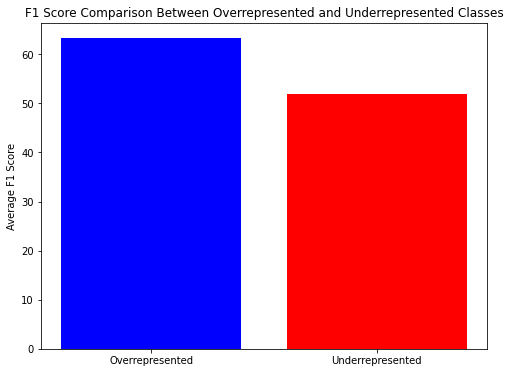

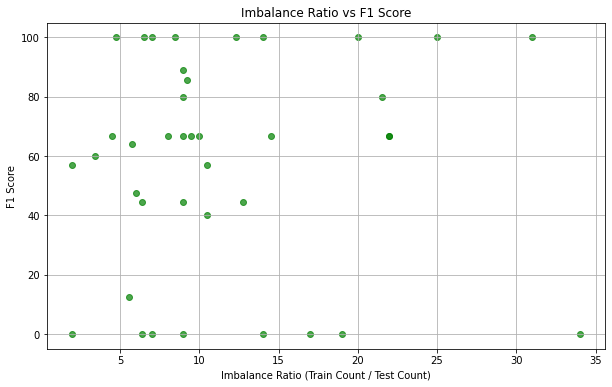

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load Data
df = pd.read_csv('data/confonet_preprocessed/sorted_combined_intent_counts.csv')

# 2. Clean Data: Replace NaNs and zeros
df['train_count'].fillna(1, inplace=True)
df['test_count'].fillna(1, inplace=True)
df['train_count'].replace(0, 1, inplace=True)
df['test_count'].replace(0, 1, inplace=True)

# 3. Calculate Class Imbalance Ratio
df['imbalance_ratio'] = df['train_count'] / df['test_count']
df['imbalance_ratio'] = df['imbalance_ratio'].apply(lambda x: max(x, 1/x))  # Ensure ratio is >= 1

# 4. Divide Classes into Overrepresented and Underrepresented
median_train_count = df['train_count'].median()

# Overrepresented classes (train_count > median)
overrepresented_df = df[df['train_count'] > median_train_count]
# Underrepresented classes (train_count <= median)
underrepresented_df = df[df['train_count'] <= median_train_count]

# 5. Calculate and Compare F1 Scores
def compare_f1_scores(df):
    """
    Compare F1 scores between overrepresented and underrepresented classes.
    """
    over_f1_score = overrepresented_df['f1_scores'].mean()
    under_f1_score = underrepresented_df['f1_scores'].mean()

    print(f"Average F1 Score for Overrepresented Classes: {over_f1_score:.4f}")
    print(f"Average F1 Score for Underrepresented Classes: {under_f1_score:.4f}")
    
    # Visualize F1 Score Comparison
    plt.figure(figsize=(8, 6))
    plt.bar(['Overrepresented', 'Underrepresented'], [over_f1_score, under_f1_score], color=['blue', 'red'])
    plt.title('F1 Score Comparison Between Overrepresented and Underrepresented Classes')
    plt.ylabel('Average F1 Score')
    plt.show()

compare_f1_scores(df)


# 7. Imbalance Ratio and F1 Score Analysis
def imbalance_f1_score_analysis(df):
    """
    Analyze the relationship between imbalance ratio and F1 score.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(df['imbalance_ratio'], df['f1_scores'], alpha=0.7, color='green')
    plt.title('Imbalance Ratio vs F1 Score')
    plt.xlabel('Imbalance Ratio (Train Count / Test Count)')
    plt.ylabel('F1 Score')
    plt.grid(True)
    plt.show()

imbalance_f1_score_analysis(df)
